## Sampling Visualisation

Our sample is quite biased in space and time. This is an attempt at visualising the sampling scheme for both data sets.

In [1]:
meta.A <- read.csv("../../DATA/SEQUENCES/data_acquisition/serotype_A_SA_metadata_final.csv")
meta.O <- read.csv("../../DATA/SEQUENCES/data_acquisition/serotype_O_SA_metadata_final.csv")

getYear <- function(x){
  return(as.factor(strsplit(as.character(x), "\\-")[[1]][1]))
}
getYear <- Vectorize(getYear)

meta.A$year <- getYear(meta.A$date)
meta.O$year <- getYear(meta.O$date)

meta.A$serotype <- "serotype_A"
meta.O$serotype <- "serotype_O"

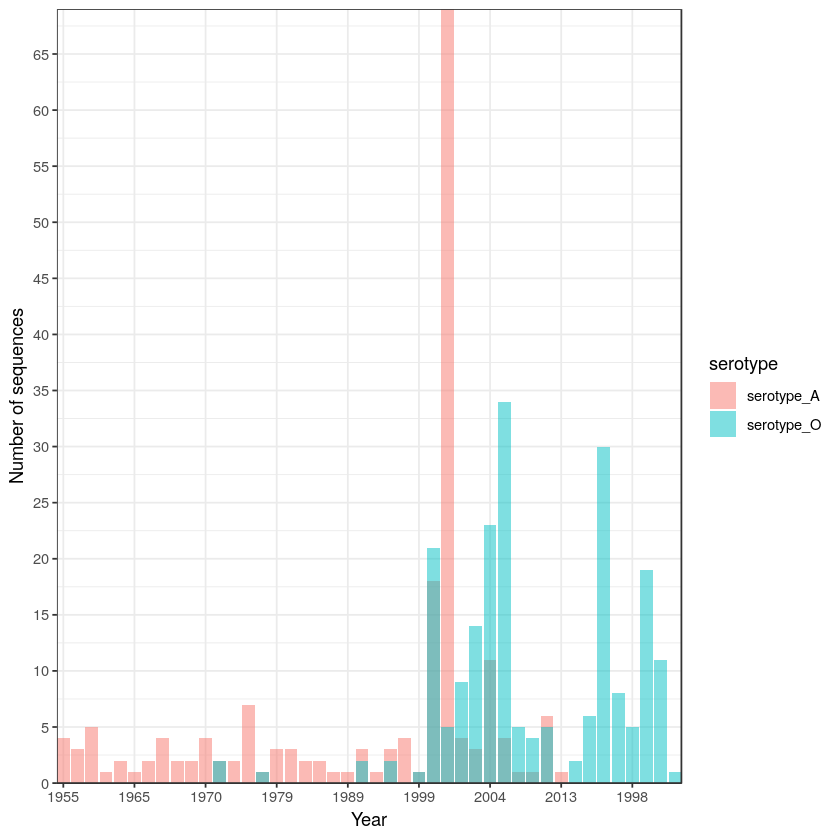

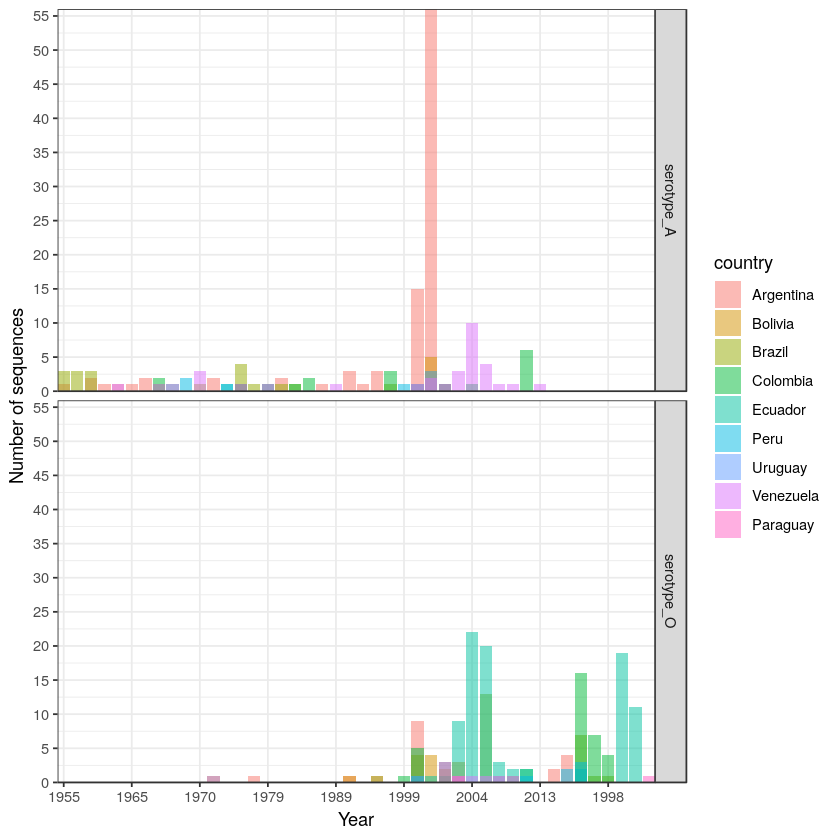

In [2]:
#### Plotting
forPlot <- rbind(meta.A, meta.O)
number_ticks <- function(n) {function(limits) pretty(limits, n)}

yearSeqs <- seq(min(as.numeric(forPlot$year)), max(as.numeric(forPlot$year)), by = 5)
Years <- unique(forPlot$year)[yearSeqs]

library(ggplot2)

ggplot(forPlot, aes(year, fill = serotype)) + 
  geom_bar(position = 'identity', alpha = .5) + 
  scale_y_continuous("Number of sequences",
                     expand = c(0, 0), breaks = number_ticks(10)) +
  scale_x_discrete("Year",
                   expand = c(0, 0), breaks = Years, labels = Years) + 
  theme_bw()

ggplot(forPlot, aes(year, fill = country)) + 
  geom_bar(position = 'identity', alpha = .5) + 
  scale_y_continuous("Number of sequences",
                     expand = c(0, 0), breaks = number_ticks(10)) +
  scale_x_discrete("Year",
                   expand = c(0, 0), breaks = Years, labels = Years) + 
  facet_grid(serotype~.) +
  theme_bw()

In [3]:
sequences_per_loc_year <- xtabs(~ country +  year + serotype, data = forPlot)
# sequences_per_loc_year
rawTab <- apply(sequences_per_loc_year, 3, function(x){
        ans <- data.frame(expand.grid(rownames(x), colnames(x)), as.vector(x))
    names(ans) <- c("country", "year", "sequence_counts")
    return(ans)
} )
rawTab$serotype_A$serotype <- "serotype_A"
rawTab$serotype_O$serotype <- "serotype_O"
forBubblePlot <- do.call(rbind, rawTab)
forBubblePlot$year <- as.numeric(as.character(forBubblePlot$year)) ## conversion from factor to numeric...
forBubblePlot$sequence_counts[forBubblePlot$sequence_counts == 0] <- NA

In [14]:
head(forBubblePlot, 4)

,country,year,sequence_counts,serotype
serotype_A.1,Argentina,1955,1,serotype_A
serotype_A.2,Bolivia,1955,NA,serotype_A
serotype_A.3,Brazil,1955,3,serotype_A
serotype_A.4,Colombia,1955,NA,serotype_A


NULL

Warning message:
“Removed 676 rows containing missing values (geom_point).”

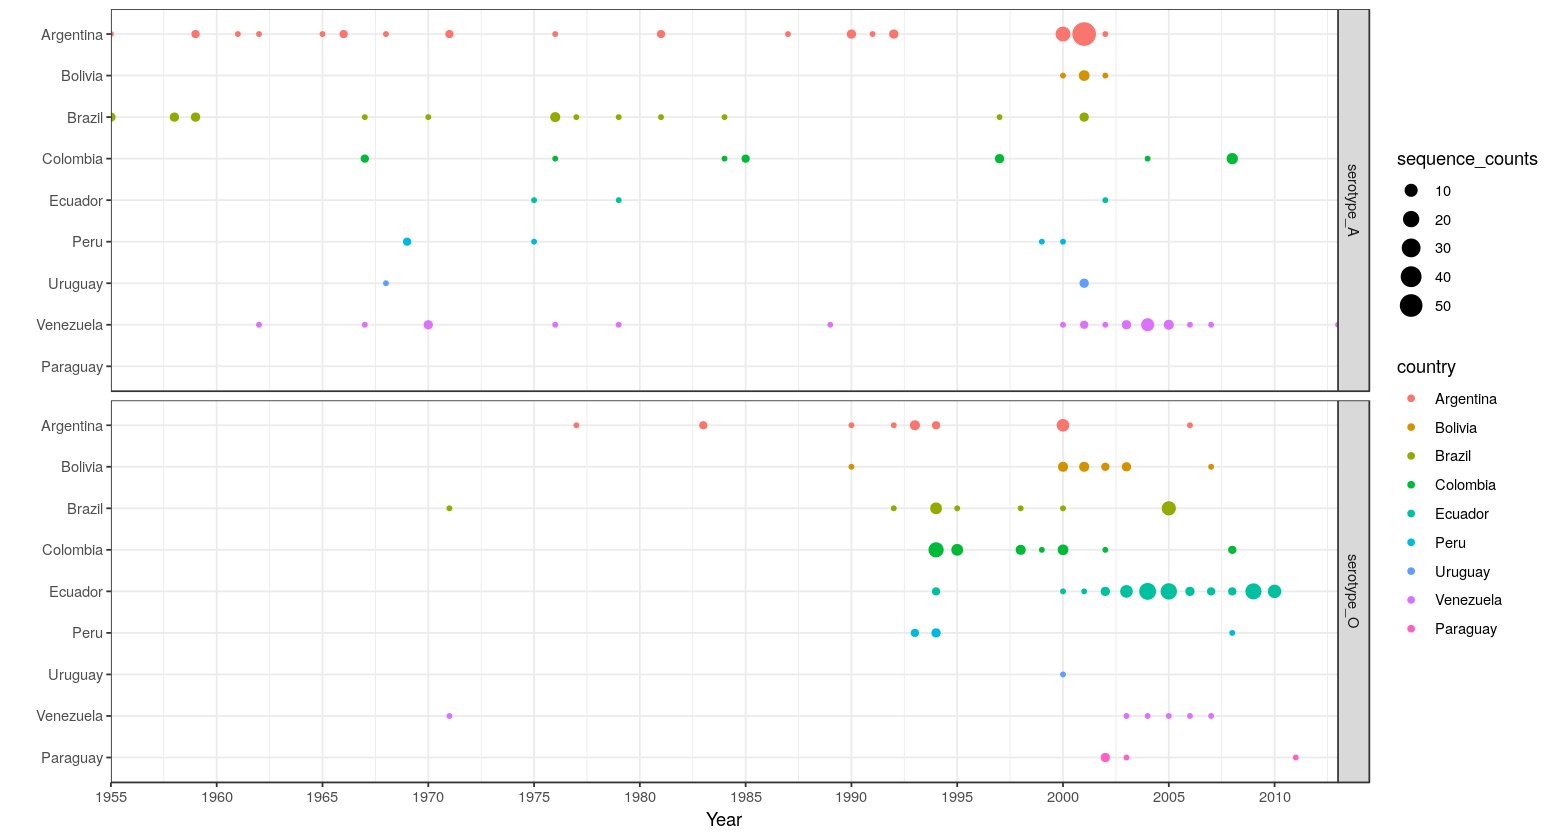

In [5]:
options(repr.plot.width = 13, repr.plot.height = 7)
sampling <- ggplot(forBubblePlot, aes(x = year, y = country, size = sequence_counts,
                                label = sequence_counts, colour = country)) +
    geom_point() +
    facet_grid( serotype ~ .) +
    scale_x_continuous("Year",
                     expand = c(0, 0), breaks = number_ticks(10)) + 
    scale_y_discrete("", limits = rev(levels(forBubblePlot$country))) +
theme_bw()
NULL


sampling

In [6]:
pdf("../../FIGURES/PLOTS/sampling_bubble_plot.pdf")
sampling
dev.off()

Warning message:
“Removed 676 rows containing missing values (geom_point).”

png 
  2

[[1]]
[1] 91

[[2]]
[1] 91

[[3]]
[1] 91

[[4]]
[1] 91

[[5]]
[1] 91